In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('readyForModelisation2.xlsx',index_col=0)
pd.set_option('display.max_columns',88)

In [3]:
from sklearn.compose import make_column_selector
categorical=make_column_selector(dtype_exclude=np.number)
numerical=make_column_selector(dtype_include=np.number)
x=df[categorical]


In [4]:
df.replace(999,np.nan,inplace=True)
df.replace(11,np.nan,inplace=True)
df.head()

,city,Sect_Comp,Opert_Princ,Opert_Period,Abonnement_Orange,Abonnement_Ooredoo,Abonnement_Telecom,Opert_Princ_Type_Offer,Opert_Princ_Recom,Opert_Princ_Offer_Eval_Global,Opert_Princ_Offer_Eval,Opert_Princ_Value_Money,Opert_Confidence,Opert_Simplify_Customers,Opert_Understand_Customers,Opert_Corp_Customers,Opert_Prob_Customers,Opert_Appreciation_Customer,Opert_Essential_service_Customer,Visite_Date,Waiting_Time_in_Store,Commercial_Eval,Time_Before_talk,commercial_understanding,commercial_solution,Visit_Eval.1,Offer_Needs,Prices_clarity,Distinguished_Offers,ability innovative offers,Services_Activation,Network_Quality,Call_efficiency,Network_Coverage,Call_Voice_Quality,Communication_Quality,Voice_Comm_Inside,Voice_Comm_Outside,Rate_Support,Rate_Trans_Cred,Rate_Trans_Internet,Rate_SOS,Rate_Fidelity_Offers,Rate_Voice_Message,Rate_Conf_Call,Rate_Roaming_Service,Network_Accessibility,Quality_Voice,Quality_Mobile_Internet,Info_cost_Roaming_Service,Cost_Roaming_Service,Quality_Internet_Connection,Mob_Internet_Accessibility,Navigation_Speed_Mobile,Price_Quality_Mob_Int,Operator_Name,Under_request,Speed_Request,Contact_sales_Request,Talk_Consult,InvoicingSystems _estimation,receiptInvoice _deadline,Invoice_easiness,Invoice_ correctness,serviceDistribCentralizedCredit_quality,Questyear,Questmonth,QuestDay,Orange,Ooredoo,TunisieTélécom,Info_Facility_Understand_numeric,Visit_Eval_numeric,Store_Staff_numeric,Request_Comprehension_numeric,Proposed_solution_in_Store_numeric,privileged welcome as a business customer_numeric,sizeComp
0,TUNIS,Industrie,Ooredoo,1 an à moins de 2 ans,Les abonnements mobiles sont fournis par l’en...,Les abonnements mobiles sont fournis par l’en...,NaN,Offre mobile prépayée,6.0,6,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,8,8,8,7,7.0,2,9,9,9,9,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.244604,6.356643,6.387324,NaN,6.386667,5.530612,6.662722,6.287425,6.373563,5.994012,unknown,NaN,NaN,NaN,NaN,7.0,6.0,7.0,7.0,NaN,2017,3,14,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,17.0
1,TUNIS,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,NaN,Offre mobile postpayé,5.0,5,6.0,5.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,7,7,7.0,4,7,7,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.137500,5.642857,5.535714,6.207756,5.533333,5.168539,6.824176,7.010417,6.840000,6.577320,unknown,NaN,NaN,NaN,NaN,7.0,6.0,7.0,7.0,NaN,2017,3,16,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,17.0
2,TUNIS,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,NaN,Offre mobile prépayée,6.0,6,6.0,6.0,5.0,6.0,4.0,6.0,5.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,6,5,5,5,5.0,4,6,6,5,5,5,NaN,7.0,7.0,NaN,NaN,NaN,NaN,6.137500,5.642857,5.535714,NaN,5.533333,5.168539,6.000000,7.000000,6.000000,6.000000,unknown,NaN,NaN,NaN,NaN,4.0,5.0,6.0,7.0,NaN,2017,3,16,1,0,0,6.0,NaN,NaN,NaN,NaN,NaN,17.0
3,TUNIS,Industrie,Ooredoo,3 mois à moins de 6 mois,NaN,Les abonnements mobiles sont fournis par l’en...,NaN,Offre mobile prépayée,3.0,5,7.0,5.0,6.0,7.0,7.0,6.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,6,6,7,7,7.0,4,7,7,7,7,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.244604,6.356643,6.387324,6.207756,6.386667,5.530612,6.662722,6.287425,6.373563,5.994012,unknown,NaN,NaN,NaN,NaN,7.0,6.0,7.0,7.0,NaN,2017,3,15,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,17.0
4,TUNIS,Santé,Tunisie Télécom,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,Les abonnements mobiles sont fournis par l’en...,Offre mobile postpayé,1.0,6,5.0,6.0,2.0,3.0,9.0,5.0,5.0,3.0,3.0,NaN,8.0,9.0,9.0,9.0,9.0,8.0,1,4,3,4,7,8.0,3,8,8,8,8,8,5.0,NaN,NaN,NaN,NaN,NaN,NaN,6.824427,6.648438,6.569343,NaN,6.420290,5.630872,6.682028,6.367925,6.589041,6.534562,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,5.0,NaN,2017,3,17,1,0,1,4.0,NaN,NaN,NaN,NaN,9.0,17.0


In [5]:
StoreEval=df[['Info_Facility_Understand_numeric', 'Visit_Eval_numeric',
       'Store_Staff_numeric', 'Request_Comprehension_numeric',
       'Proposed_solution_in_Store_numeric',
       'privileged welcome as a business customer_numeric','Waiting_Time_in_Store',
        'Commercial_Eval','Time_Before_talk','commercial_understanding','commercial_solution','Visit_Eval.1',
            ]]


AppelEval=df[['Network_Quality','Rate_SOS',
       'Call_efficiency', 'Network_Coverage', 'Call_Voice_Quality',
       'Communication_Quality', 'Voice_Comm_Inside', 'Voice_Comm_Outside',
             'Rate_Conf_Call', 'Rate_Voice_Message']]


InternetEval=df[['Quality_Internet_Connection',
       'Mob_Internet_Accessibility', 'Navigation_Speed_Mobile',
       'Price_Quality_Mob_Int','Rate_Trans_Internet']]

RoamingEval=df[['Rate_Roaming_Service', 'Network_Accessibility', 'Quality_Voice',
       'Quality_Mobile_Internet', 'Info_cost_Roaming_Service',
       'Cost_Roaming_Service']]



In [6]:
df_clean=df.drop([  'Info_Facility_Understand_numeric', 'Visit_Eval_numeric',
       'Store_Staff_numeric', 'Request_Comprehension_numeric',
       'Proposed_solution_in_Store_numeric',
       'privileged welcome as a business customer_numeric','Waiting_Time_in_Store',
        'Commercial_Eval','Time_Before_talk','commercial_understanding','commercial_solution','Visit_Eval.1','Network_Quality','Rate_SOS',
       'Call_efficiency', 'Network_Coverage', 'Call_Voice_Quality',
       'Communication_Quality', 'Voice_Comm_Inside', 'Voice_Comm_Outside',
             'Rate_Conf_Call', 'Rate_Voice_Message','Quality_Internet_Connection',
       'Mob_Internet_Accessibility', 'Navigation_Speed_Mobile',
       'Price_Quality_Mob_Int','Rate_Trans_Internet','Rate_Roaming_Service', 'Network_Accessibility', 'Quality_Voice',
       'Quality_Mobile_Internet', 'Info_cost_Roaming_Service',
       'Cost_Roaming_Service'],axis=1,errors='ignore')

In [7]:
df_clean.shape

(1439, 45)

In [8]:
df_clean['Appel_score']=AppelEval.mean(axis=1)
df_clean['Roamnig_score']=RoamingEval.mean(axis=1)
df_clean['Internet_score']=InternetEval.mean(axis=1)
df_clean['Store_score']=StoreEval.mean(axis=1)

globall=df_clean[['Appel_score','Roamnig_score','Internet_score','Store_score']]
df_clean['note']=globall.mean(axis=0)
#---------------------------------------------------
AppelEval['Appel_score']=AppelEval.mean(axis=1)
RoamingEval['Roamnig_score']=RoamingEval.mean(axis=1)
InternetEval['Internet_score']=InternetEval.mean(axis=1)
StoreEval['store_score']=StoreEval.mean(axis=1)


In [9]:
df_clean.head()

,city,Sect_Comp,Opert_Princ,Opert_Period,Abonnement_Orange,Abonnement_Ooredoo,Abonnement_Telecom,Opert_Princ_Type_Offer,Opert_Princ_Recom,Opert_Princ_Offer_Eval_Global,Opert_Princ_Offer_Eval,Opert_Princ_Value_Money,Opert_Confidence,Opert_Simplify_Customers,Opert_Understand_Customers,Opert_Corp_Customers,Opert_Prob_Customers,Opert_Appreciation_Customer,Opert_Essential_service_Customer,Visite_Date,Offer_Needs,Prices_clarity,Distinguished_Offers,ability innovative offers,Services_Activation,Rate_Support,Rate_Trans_Cred,Rate_Fidelity_Offers,Operator_Name,Under_request,Speed_Request,Contact_sales_Request,Talk_Consult,InvoicingSystems _estimation,receiptInvoice _deadline,Invoice_easiness,Invoice_ correctness,serviceDistribCentralizedCredit_quality,Questyear,Questmonth,QuestDay,Orange,Ooredoo,TunisieTélécom,sizeComp,Appel_score,Roamnig_score,Internet_score,Store_score,note
0,TUNIS,Industrie,Ooredoo,1 an à moins de 2 ans,Les abonnements mobiles sont fournis par l’en...,Les abonnements mobiles sont fournis par l’en...,NaN,Offre mobile prépayée,6.0,6,6.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,8,8,8,8,7,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,7.0,6.0,7.0,7.0,NaN,2017,3,14,1,1,0,17.0,7.714286,6.181170,6.329431,NaN,NaN
1,TUNIS,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,NaN,Offre mobile postpayé,5.0,5,6.0,5.0,5.0,6.0,5.0,5.0,4.0,4.0,4.0,NaN,6,6,6,7,7,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,7.0,6.0,7.0,7.0,NaN,2017,3,16,1,0,0,17.0,6.571429,5.704283,6.812978,NaN,NaN
2,TUNIS,Services,Orange,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,NaN,Offre mobile prépayée,6.0,6,6.0,6.0,5.0,6.0,4.0,6.0,5.0,7.0,6.0,NaN,5,6,5,5,5,NaN,7.0,NaN,unknown,NaN,NaN,NaN,NaN,4.0,5.0,6.0,7.0,NaN,2017,3,16,1,0,0,17.0,5.142857,5.603589,6.400000,6.000,NaN
3,TUNIS,Industrie,Ooredoo,3 mois à moins de 6 mois,NaN,Les abonnements mobiles sont fournis par l’en...,NaN,Offre mobile prépayée,3.0,5,7.0,5.0,6.0,7.0,7.0,6.0,7.0,6.0,7.0,NaN,6,6,6,7,7,NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,7.0,6.0,7.0,7.0,NaN,2017,3,15,0,1,0,17.0,6.571429,6.185601,6.329431,NaN,NaN
4,TUNIS,Santé,Tunisie Télécom,3 ans ou plus,Certains ou tous les employés ont leur propre...,NaN,Les abonnements mobiles sont fournis par l’en...,Offre mobile postpayé,1.0,6,5.0,6.0,2.0,3.0,9.0,5.0,5.0,3.0,3.0,NaN,1,4,3,4,7,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.0,5.0,NaN,2017,3,17,1,0,1,17.0,7.285714,6.418674,6.543389,8.125,NaN


In [10]:
RoamingEval.head()

,Rate_Roaming_Service,Network_Accessibility,Quality_Voice,Quality_Mobile_Internet,Info_cost_Roaming_Service,Cost_Roaming_Service,Roamnig_score
0,6.244604,6.356643,6.387324,NaN,6.386667,5.530612,6.181170
1,6.137500,5.642857,5.535714,6.207756,5.533333,5.168539,5.704283
2,6.137500,5.642857,5.535714,NaN,5.533333,5.168539,5.603589
3,6.244604,6.356643,6.387324,6.207756,6.386667,5.530612,6.185601
4,6.824427,6.648438,6.569343,NaN,6.420290,5.630872,6.418674


In [11]:
InternetEval.head()

,Quality_Internet_Connection,Mob_Internet_Accessibility,Navigation_Speed_Mobile,Price_Quality_Mob_Int,Rate_Trans_Internet,Internet_score
0,6.662722,6.287425,6.373563,5.994012,NaN,6.329431
1,6.824176,7.010417,6.840000,6.577320,NaN,6.812978
2,6.000000,7.000000,6.000000,6.000000,7.0,6.400000
3,6.662722,6.287425,6.373563,5.994012,NaN,6.329431
4,6.682028,6.367925,6.589041,6.534562,NaN,6.543389


In [12]:
AppelEval.head()

,Network_Quality,Rate_SOS,Call_efficiency,Network_Coverage,Call_Voice_Quality,Communication_Quality,Voice_Comm_Inside,Voice_Comm_Outside,Rate_Conf_Call,Rate_Voice_Message,Appel_score
0,7.0,NaN,2,9,9,9,9,9,NaN,NaN,7.714286
1,7.0,NaN,4,7,7,7,7,7,NaN,NaN,6.571429
2,5.0,NaN,4,6,6,5,5,5,NaN,NaN,5.142857
3,7.0,NaN,4,7,7,7,7,7,NaN,NaN,6.571429
4,8.0,NaN,3,8,8,8,8,8,NaN,NaN,7.285714


In [13]:
StoreEval.dropna()

,Info_Facility_Understand_numeric,Visit_Eval_numeric,Store_Staff_numeric,Request_Comprehension_numeric,Proposed_solution_in_Store_numeric,privileged welcome as a business customer_numeric,Waiting_Time_in_Store,Commercial_Eval,Time_Before_talk,commercial_understanding,commercial_solution,Visit_Eval.1,store_score
43,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
251,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
587,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
795,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
1227,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
1435,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667


## Dummies 

In [14]:
Y=df_clean['Appel_score'] # mrigla
Y1=df_clean['Roamnig_score'] #mrigla 
Y2=df_clean['Internet_score'] #courbe kheyba 
Y3=df_clean['Store_score']  #nan

In [15]:
status = pd.get_dummies(x,drop_first=True)
status.head()

,city_SFAX,city_TUNIS,Sect_Comp_Assurances,Sect_Comp_Banque,Sect_Comp_Commerce,Sect_Comp_INFORMATIQUE,Sect_Comp_Industrie,Sect_Comp_Santé,Sect_Comp_Services,Sect_Comp_Tourisme,Opert_Princ_Orange,Opert_Princ_Tunisie Télécom,Opert_Period_2 ans à moins de 3 ans,Opert_Period_3 ans ou plus,Opert_Period_3 mois à moins de 6 mois,Opert_Period_6 mois à moins de 12 mois,Opert_Period_Il y a moins de 3 mois,Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Telecom_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Opert_Princ_Type_Offer_Offre mobile postpayé,Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte,Opert_Princ_Type_Offer_Offre mobile prépayée,Opert_Princ_Type_Offer_Offre mobile prépayée avec tarif préférentiel intra-flotte,Visite_Date_3 mois à moins de 6 mois,Visite_Date_6 mois à moins de 12 mois,Visite_Date_Il y a moins de 3 mois,Operator_Name_Ooredoo,Operator_Name_Orange,Operator_Name_TunisieTélécom,Operator_Name_unknown
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
df_clean= pd.concat([Y,Y1,Y2,Y3,status],axis=1)
df.shape

(1439, 78)

## Scaling

In [17]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
df_clean = df_clean.apply(normalize) 

In [18]:
df_clean.head()

,Appel_score,Roamnig_score,Internet_score,Store_score,city_SFAX,city_TUNIS,Sect_Comp_Assurances,Sect_Comp_Banque,Sect_Comp_Commerce,Sect_Comp_INFORMATIQUE,Sect_Comp_Industrie,Sect_Comp_Santé,Sect_Comp_Services,Sect_Comp_Tourisme,Opert_Princ_Orange,Opert_Princ_Tunisie Télécom,Opert_Period_2 ans à moins de 3 ans,Opert_Period_3 ans ou plus,Opert_Period_3 mois à moins de 6 mois,Opert_Period_6 mois à moins de 12 mois,Opert_Period_Il y a moins de 3 mois,Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Telecom_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Opert_Princ_Type_Offer_Offre mobile postpayé,Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte,Opert_Princ_Type_Offer_Offre mobile prépayée,Opert_Princ_Type_Offer_Offre mobile prépayée avec tarif préférentiel intra-flotte,Visite_Date_3 mois à moins de 6 mois,Visite_Date_6 mois à moins de 12 mois,Visite_Date_Il y a moins de 3 mois,Operator_Name_Ooredoo,Operator_Name_Orange,Operator_Name_TunisieTélécom,Operator_Name_unknown
0,0.899800,0.705055,0.609078,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.739479,0.627722,0.664340,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.539078,0.611393,0.617143,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.739479,0.705773,0.609078,NaN,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.839679,0.743569,0.633530,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#   Splitting Data into Training and Testing Sets

In [19]:
df_clean.columns

Index(['Appel_score', 'Roamnig_score', 'Internet_score', 'Store_score',
       'city_SFAX', 'city_TUNIS', 'Sect_Comp_Assurances', 'Sect_Comp_Banque',
       'Sect_Comp_Commerce', 'Sect_Comp_INFORMATIQUE', 'Sect_Comp_Industrie',
       'Sect_Comp_Santé', 'Sect_Comp_Services', 'Sect_Comp_Tourisme',
       'Opert_Princ_Orange', 'Opert_Princ_Tunisie Télécom',
       'Opert_Period_2 ans à moins de 3 ans', 'Opert_Period_3 ans ou plus',
       'Opert_Period_3 mois à moins de 6 mois',
       'Opert_Period_6 mois à moins de 12 mois',
       'Opert_Period_Il y a moins de 3 mois',
       'Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise',
       'Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise',
       'Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entrep

In [20]:
df_clean.head(0)

,Appel_score,Roamnig_score,Internet_score,Store_score,city_SFAX,city_TUNIS,Sect_Comp_Assurances,Sect_Comp_Banque,Sect_Comp_Commerce,Sect_Comp_INFORMATIQUE,Sect_Comp_Industrie,Sect_Comp_Santé,Sect_Comp_Services,Sect_Comp_Tourisme,Opert_Princ_Orange,Opert_Princ_Tunisie Télécom,Opert_Period_2 ans à moins de 3 ans,Opert_Period_3 ans ou plus,Opert_Period_3 mois à moins de 6 mois,Opert_Period_6 mois à moins de 12 mois,Opert_Period_Il y a moins de 3 mois,Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Telecom_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Opert_Princ_Type_Offer_Offre mobile postpayé,Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte,Opert_Princ_Type_Offer_Offre mobile prépayée,Opert_Princ_Type_Offer_Offre mobile prépayée avec tarif préférentiel intra-flotte,Visite_Date_3 mois à moins de 6 mois,Visite_Date_6 mois à moins de 12 mois,Visite_Date_Il y a moins de 3 mois,Operator_Name_Ooredoo,Operator_Name_Orange,Operator_Name_TunisieTélécom,Operator_Name_unknown


In [21]:
# Putting feature variable to X
X = df_clean[[ 'city_SFAX', 'city_TUNIS',
       'Sect_Comp_Assurances', 'Sect_Comp_Banque', 'Sect_Comp_Commerce',
        'Sect_Comp_Industrie', 'Sect_Comp_Santé',
       'Sect_Comp_Services', 'Sect_Comp_Tourisme', 'Opert_Princ_Orange',
       'Opert_Princ_Tunisie Télécom', 'Opert_Period_2 ans à moins de 3 ans',
       'Opert_Period_3 ans ou plus', 
       'Opert_Period_6 mois à moins de 12 mois',
       
       'Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise',
       'Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise',
       'Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
       'Abonnement_Ooredoo_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise',
       
       'Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
  
       'Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise',
       'Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
       'Opert_Princ_Type_Offer_Offre mobile postpayé',
       'Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte',
       'Opert_Princ_Type_Offer_Offre mobile prépayée',
       'Opert_Princ_Type_Offer_Offre mobile prépayée avec tarif préférentiel intra-flotte',
       ]]

# Putting response variable to y
y = df_clean['Appel_score']


In [22]:
X.drop('Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte',axis=1,inplace=True,errors='ignore')
X.drop('Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',axis=1,inplace=True,errors='ignore')
X.drop('Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise'  
        ,axis=1,inplace=True,errors='ignore')
X.drop(['Sect_Comp_Assurances','city_TUNIS','city_SFAX','Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise'
,'Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise'],axis=1,inplace=True)

# Bayesian Ridge Regression

In [26]:
from sklearn.linear_model import BayesianRidge, LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8 , random_state=43)

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [24]:
Y

0       7.714286
1       6.571429
2       5.142857
3       6.571429
4       7.285714
          ...   
1434    7.142857
1435    1.300000
1436    6.000000
1437    5.428571
1438    7.000000
Name: Appel_score, Length: 1439, dtype: float64

In [36]:
clf = BayesianRidge(compute_score=True)
clf.fit(X_train, y_train)

BayesianRidge(compute_score=True)

In [37]:
print(y_train.iloc[15])
clf.predict([X_train.iloc[15]])

7.285714285714286


array([6.59910433])

In [32]:
y_pred = clf.predict(X_test)

<AxesSubplot:xlabel='Appel_score'>

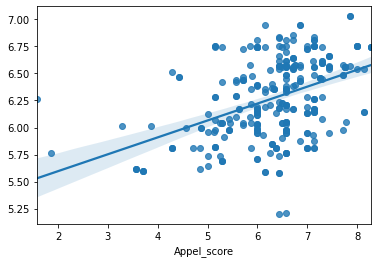

In [33]:
sns.regplot(y_test,y_pred)

In [38]:
import sklearn.metrics as metrics
def regression_results(y_test, Y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_test, Y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, Y_pred)
    mse=metrics.mean_squared_error(y_test, Y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, Y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, Y_pred)
    r2=metrics.r2_score(y_test, Y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [39]:
regression_results(y_test, y_pred)

explained_variance:  0.1844
mean_squared_log_error:  0.0218
r2:  0.1809
MAE:  0.7091
MSE:  0.8633
RMSE:  0.9291
